# **Report 1: DANKMEMES Subtask 1 - Meme Classification**

Loading Resources to Workspace - 

In [126]:
! pip install -q tensorflow numpy pandas scikit-learn mlxtend dataprep
! cp drive/My\ Drive/Colab\ Notebooks/*.csv ./

In [142]:
import pandas as pd

df = pd.read_csv('dankmemes_task1_train.csv')
embedding = pd.read_csv('dankmemes_task1_train_embeddings.csv', header=None)

# **Visualising Data**

## **Using Visualising Packages**

Visualisation of data using packages are employed in order to quickly garner an idea of approaches to the provided tasks. Packages used are as follows. 


### Using **```mlxtend```**

The following scatterplot depicts certain feature columns, the target column and the correlation between them. Aa it is observed that the correlation is not distinctive, the use of nueral networks through **```tensorlflow```** is idealised. 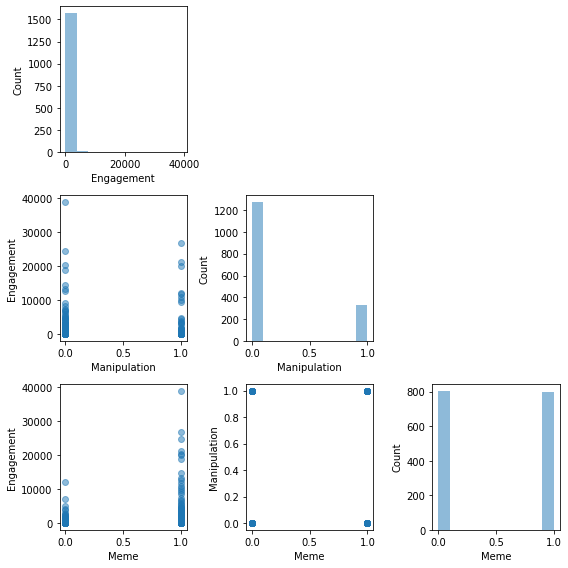

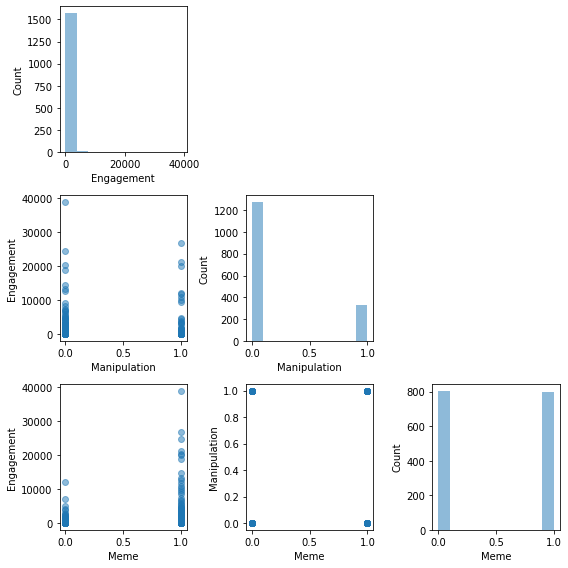

In [159]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

col = ['Engagement', 'Manipulation', 'Meme']
scatterplotmatrix(df[col].values, alpha=0.5, names=col)
plt.tight_layout()
plt.show()

### Using **```dataprep```**

The **```dataprep```** is a versatile package that allows for a high degree of data display. This has provided strong impacts on analytics. 


As the package returns an HTML document that cannot be rendered by IPython on Google Colaboratory, the document is present in the GitHub Repository. This contains scatterplot matrices crucial to the preliminary data analytics.



In [144]:
from dataprep.eda import plot, plot_missing, plot_correlation

plot(df)
plot_correlation(df)

## **Random Forests**

Ran a random trees model in order to get a impact distribution of the selected feature columns and to rule out an ensemble learning approach. Document as present in GitHub repository under **```randomforests.py```**

 - Manipulation                   33.3058%
 - Engagement                     66.6942%

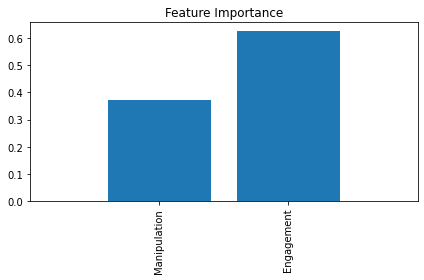


 1) Manipulation                   0.349252
 2) Engagement                     0.650748


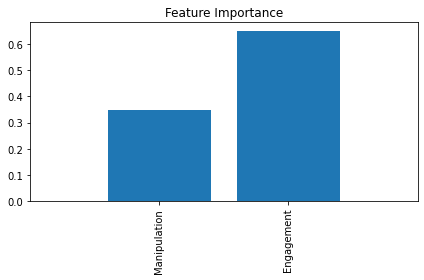

 1) Manipulation                   0.351136
 2) Engagement                     0.648864


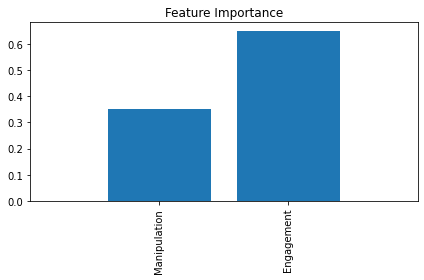

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('dankmemes_task1_train.csv')
X, y = df[['Engagement', 'Manipulation']].values, df[['Meme']].values

ct = ColumnTransformer([('standardsc', StandardScaler(), [0]),
                        ('nothing', 'passthrough', [1])])
X = ct.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y)
forest = RandomForestClassifier(n_estimators=500)
forest.fit(X_train, y_train.reshape(1280,))

importances = forest.feature_importances_
indices = np.argsort(importances)[::1]
feat_labels = df[["Engagement", "Manipulation"]].columns[:]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[indices[f]],
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center')
plt.xticks(range(X_train.shape[1]),
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()


## **Decision Tree Classification**

I used another basic classification method used as a preliminary test for data correlation. The plotted data describes without doubt the complexity of the data analysis. 

Document as present in GitHub repository under **```decisiontreeclassifiication.py```**

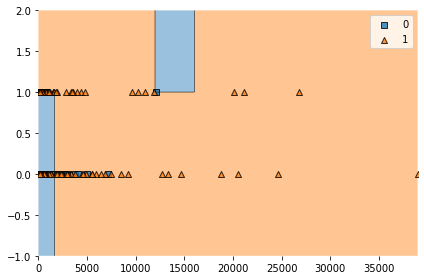

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


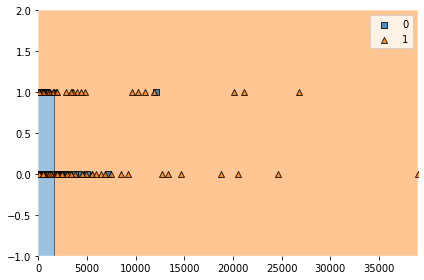

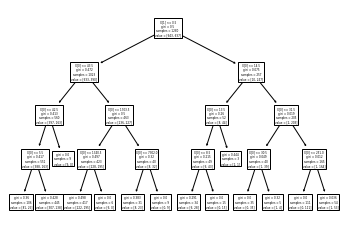

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


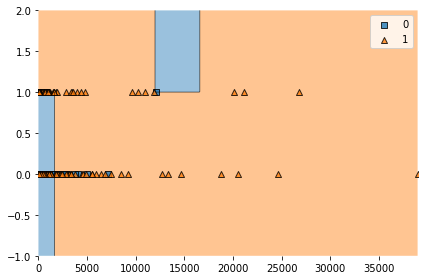

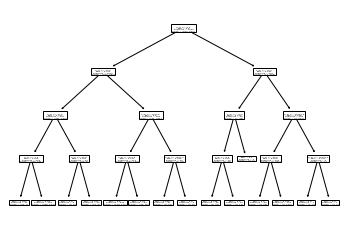

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

df = pd.read_csv('dankmemes_task1_train.csv')
X, y = df[['Engagement', 'Manipulation']].values, df[['Meme']].values
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y)
dtc = DecisionTreeClassifier(criterion='gini',
                             max_depth=4)
dtc.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.vstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined.reshape(1600,),
                      clf=dtc)
plt.legend(loc='best')
plt.tight_layout()
plt.show()
plot_tree(dtc)
plt.show()

At this stage, approach is clear. I have completely ruled out the use of simple classifiers. It is also apparent that any trained model will be highly prone to overfitting.

# **Data Preprocessing**

The following columns are present in the first datafile. The embed file contains image embeddings.

In [147]:
print(df.columns)

### Value Initialization
X = np.array([])
y = df[['Meme']].values

Index(['File', 'Engagement', 'Date', 'Manipulation', 'Visual', 'Text', 'Meme'], dtype='object')
Index(['File', 'Engagement', 'Date', 'Manipulation', 'Visual', 'Text', 'Meme'], dtype='object')


## **Categorical Classification**
- File - N/A
- Engagement - Numeric [Standardization]
- Date - Ordinal [Numeric Conversion -> MinMax Normalization]
- Manipulation - Ordinal [No Action]
- Visual - Nominal [Onehot Encoding]
- Text* - Working on this currently
- Embedding - Numeric [No Action]
- Meme - Target Data [No Action]


### Engagement
The engagement per post is expressed a numeric integer value. This is scaled and standardized. 

In [148]:
ssc = StandardScaler()
temp = ssc.fit_transform(df[['Engagement']].values)
print(temp.shape)
X = temp
print(X.shape)

(1600, 1)
(1600, 1)
(1600, 1)
(1600, 1)


### Date

The dates are represented in the **```yyyy-mm-dd```** format. The datetime has been converted to the total number of days and the minmax scaling is applied to the feature thus converting it into a numeric float that suitable to be trained.

While date numerics will better suit Subtask 3, where memes are catergorically devided, events entail an upsurge of memes uploaded which should entail better classification performance.

In [149]:
from sklearn.preprocessing import MinMaxScaler
from datetime import date

mms = MinMaxScaler()
temp = mms.fit_transform(np.array([(date(int(i[0].split('-')[0]), int(i[0].split('-')[1]), int(i[0].split('-')[2])) - date(2015, 1, 1)).days for i in df[['Date']].values.tolist()]).reshape(1600, 1))
print(temp.shape)
X = np.hstack((X, temp))
print(X.shape)

(1600, 1)
(1600, 2)
(1600, 1)
(1600, 2)


### Manipulation

Describes if the image is manipulated or not. As the values are well represented and trainable, no preprocessing was required for this step. 

In [150]:
temp = df[['Manipulation']].values
print(temp.shape)
X = np.hstack((X, temp))
print(X.shape)

(1600, 1)
(1600, 3)
(1600, 1)
(1600, 3)


### Visual

The visual referenced in the meme is depicted. The categories are one-hot encoded and converted into numeric format as valid trainable parameters.

In [151]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
temp = ohe.fit_transform(df[['Visual']].values.reshape(-1, 1)).toarray().astype(float)
print(temp.shape)
X = np.hstack((X, temp))
print(X.shape)

(1600, 153)
(1600, 156)
(1600, 153)
(1600, 156)


### Embedding

The images are embedded into numeric values and are preprocessed by the organisation team, hence there is no processing applied to the provided data. 

In [152]:
temp = np.array([embedding[1][i].split() for i in range(1600)]).astype(float)
print(temp.shape)
X = np.hstack((X, temp))
print(X.shape)

(1600, 2048)
(1600, 2204)
(1600, 2048)
(1600, 2204)


## **Dataset Creation**

Using the preprocessed data, the array is divided into training and validation datsets which is converted into a tensorflow dataset. 

In [153]:
import tensorflow as tf

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
ds_train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
ds_valid = tf.data.Dataset.from_tensor_slices((X_test, y_test))

# **Building the Neural Network**

At this stage, the data is ready for training. The model is created, trained and the results are plotted.

## **Model Definition**

The base model is created and built using an appropriate function defined as follows.

In [154]:
def build_model(input_shape=(None, 2204)):
  model = tf.keras.Sequential([tf.keras.layers.Dense(1024, 
                                                     name='dense_1',
                                                     activation=tf.keras.activations.relu),
                               tf.keras.layers.Dropout(rate=0.8), ## Dropout to improve generalization performance
                               tf.keras.layers.Dense(2048, 
                                                     name='dense_2',
                                                     activation=tf.keras.activations.relu),
                               tf.keras.layers.Dropout(rate=0.5),
                               tf.keras.layers.Dense(1024, 
                                                     name='dense_3',
                                                     activation=tf.keras.activations.relu),
                               tf.keras.layers.Dropout(rate=0.8),
                               tf.keras.layers.Dense(1, name='output',
                                                     activation=tf.keras.activations.sigmoid)])
  print(model.compute_output_shape(input_shape=input_shape))
  model.build(input_shape=input_shape)
  return model

## **Network Initialization**

Network parameters are initialized including buffer and batch sizes with the epoch counts. Using these values, the dataset is batched and shuffled for model training. 


In [155]:
buffer_size = 10000
batch_size = 64
num_epochs = 75

ds_train = ds_train.shuffle(buffer_size=buffer_size,
                            reshuffle_each_iteration=False)
ds_valid = ds_valid.batch(batch_size)
ds_train = ds_train.batch(batch_size)

The model is then built, compiled and a summary of the model is printed.

In [156]:
model = build_model()
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])
model.summary()

(None, 1)
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              multiple                  2257920   
_________________________________________________________________
dropout_21 (Dropout)         multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  2099200   
_________________________________________________________________
dropout_22 (Dropout)         multiple                  0         
_________________________________________________________________
dense_3 (Dense)              multiple                  2098176   
_________________________________________________________________
dropout_23 (Dropout)         multiple                  0         
_________________________________________________________________
output (Dense)               multiple       

## **Model Training**

In [157]:
hist = model.fit(ds_train,
                 validation_data=ds_valid,
                 epochs=num_epochs,
                 batch_size=batch_size)

Epoch 1/75

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



Layer dense_1 is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



20/20 [==============================] - 2s 102ms/step - loss: 1.9176 - binary_accuracy: 0.5219 - val_loss: 0.6206 - val_binary_accuracy: 0.6438
Epoch 2/75
20/20 [==============================] - 2s 97ms/step - loss: 1.1086 - binary_accuracy: 0.5938 - val_loss: 0.5730 - val_binary_accuracy: 0.6750
Epoch 3/75
20/20 [==============================] - 2s 96ms/step - loss: 0.6212 - binary_accuracy: 0.6828 - val_loss: 0.5570 - val_binary_accuracy: 0.7156
Epoch 4/75
20/20 [==============================] - 2s 94ms/step - loss: 0.5687 - binary_accuracy: 0.7094 - val_loss: 0.5248 - val_binary_accuracy: 0.7563
Epoch 5/75
20/20 [==============================] - 2s 97ms/step - loss: 0.5888 - binary_accuracy: 0.6898 - val_loss: 0.5462 - val_binary_accuracy: 0.7219
Epoch 6/75
20/20 [==============================] - 2s 96ms/step - loss: 0.5732 - binary_accuracy: 0.6938 - val_loss: 0.5240 - val_binary_accuracy: 0.7812
Epoch 7/75
20/20 [==============================] - 2s 97ms/step - loss: 0.5367 

## **Result Plotting**

Derived results are finally plotted in order for model visualisation and to evaluate generalization performance. 

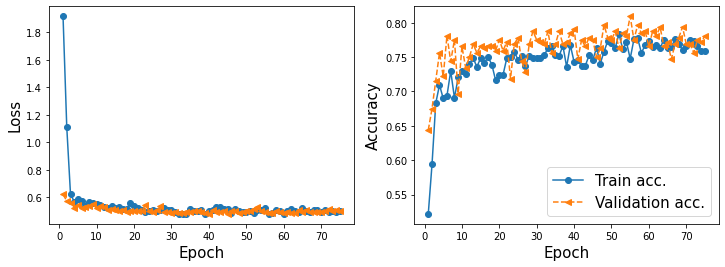

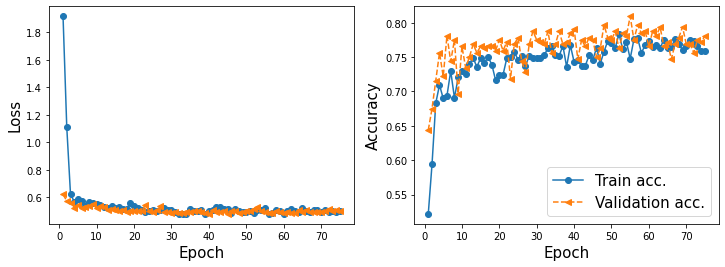

In [158]:
history = hist.history
x_arr = np.arange(len(history['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, history['loss'], '-o', label='Train loss')
ax.plot(x_arr, history['val_loss'], '--<', label='Validation loss')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, history['binary_accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, history['val_binary_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)

plt.show()

## **Model Retention**

The generated model is stored for predictive use and testing purposes. It is

In [160]:
model.save('models/rough_dnn')
! cp -r models ./drive/My\ Drive/Colab\ Notebooks/

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/resource_variable_ops.py:1817: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


INFO:tensorflow:Assets written to: models/rough_dnn/assets


Assets written to: models/rough_dnn/assets


# **Next Steps**

- Processing of provided texts using bag-of-words model, length analysis and language semantics
- Using Tensorflow's feature columns for the use for better feature seperation.
- Employing specific techniques based on latest research to fix problem statement specific complications.

